In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
2D_orbit_modeling_K.pdf
2D_orbit_modeling_K1.ipynb
2D_orbit_modeling_K1.pdf
2D_orbit_modeling_K2.ipynb
2D_orbit_modeling_K2.pdf
2D_orbit_modeling_P.ipynb
2D_orbit_modeling_P.pdf
2D_orbit_modeling_e.ipynb
2D_orbit_modeling_e.pdf
2D_orbit_modeling_tau.ipynb
2D_orbit_modeling_tau.pdf
2D_orbit_modeling_w.ipynb
2D_orbit_modeling_w.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2_rev3.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_r

In [3]:
#Read data ---#1
Input = "Linear_fit_Beuermann_2011_Table1_rev.dat"
Data   = np.genfromtxt(Input)

#Input calculation ---#1
N = 2400000

Epoch = Data[:,0]
T_obs = Data[:,1]
T_obs_err = Data[:,2]

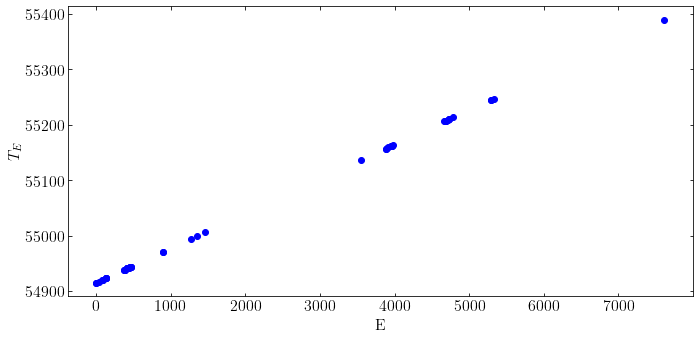

In [4]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
#plt.xlim(-0.04,0.04)
#plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch, T_obs, yerr= T_obs_err, fmt='o', color='blue',
             ecolor='lightgray', elinewidth=1, capsize=0)


#ax0.legend(loc="best")
ax0.set_xlabel('E')
ax0.set_ylabel('$T_{E}$')

#ax0.set_ylim(-30, 40)

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
#plt.savefig("spot_longitude_Beuermann_Kittipong.png")
plt.show()

In [5]:
x = Epoch
y = T_obs
dy = T_obs_err

len_x = len(x)
print(len_x)

54


In [6]:
# Calling the scipy's curve_fit function from optimize module
from scipy.optimize import curve_fit

# Defining a fitting fucntion
def linear_fit(x,m,c):
    return m*x + c

#params, covariance = curve_fit(f = linear_fit, xdata = x, ydata = y)
params, params_covariance = optimization.curve_fit(linear_fit, x, y,sigma=dy, absolute_sigma=True)

Period = params[0]
T0 = params[1]

dPeriod = params_covariance[0,0]
dT0 = params_covariance[1,1]


print('Slope (m) is ', Period)
print('The error of the slope (dm) is ', dPeriod)
print('Intercept (c) is ', T0)
print('The error of the intercept (dc) is ', dT0)
#print(covariance)

Slope (m) is  0.06236285649304073
The error of the slope (dm) is  8.980005261065642e-19
Intercept (c) is  54914.832292031744
The error of the intercept (dc) is  7.591088868471324e-12


In [7]:
# define a sequence of inputs between the smallest and largest known inputs
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
# calculate the output for the range
y_line = linear_fit(x_line, *params)

ys = Period*x + T0 #just only our data point
Residual = y - ys
print(y)
print(ys)
print(Residual)

print(x_line)
print(y_line)
print(len(x_line))

#np.savetxt("Linear_fit_period_year_2020g.out", np.c_[x, Residual, dy])

#Reduced_chisqrt
n = 2
dof = len_x - n
Chi_sqr = ((y - ys)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[54914.83228  54914.894663 54916.827926 54919.696603 54920.756784
 54922.627668 54922.690017 54922.752365 54922.814727 54937.781831
 54937.844195 54938.717285 54938.779611 54940.650507 54940.712869
 54940.775243 54940.837637 54941.773045 54941.835408 54942.646122
 54942.770852 54942.833221 54942.895591 54943.706304 54943.768653
 54943.831008 54970.647033 54970.709414 54993.658926 54998.647982
 55005.632601 55135.970976 55156.9249   55156.987244 55157.922708
 55158.982865 55160.916107 55160.978466 55161.913906 55161.976285
 55162.911738 55205.942102 55206.004463 55206.93992  55207.002308
 55208.873171 55209.870977 55209.933305 55209.995687 55212.989111
 55244.918892 55244.981257 55246.976864 55389.66308 ]
[54914.83229203 54914.89465489 54916.82790344 54919.69659484
 54920.7567634  54922.62764909 54922.69001195 54922.75237481
 54922.81473766 54937.78182322 54937.84418608 54938.71726607
 54938.77962893 54940.65051462 54940.71287748 54940.77524033
 54940.83760319 54941.77304604 54941.83540

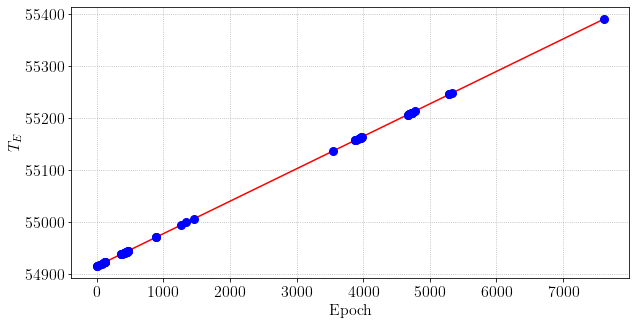

In [8]:
#Plotgraph
fig=plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('$T_{E}$')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()

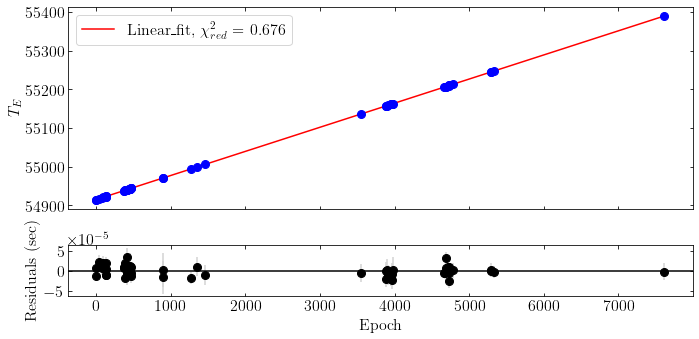

In [9]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.plot(x_line, y_line, '-', color='red',label='Linear\_fit, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.legend(loc="best")
ax0.set_ylabel('$T_{E}$')
ax1.set_ylabel('Residuals (sec)')


ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#plt.savefig("Linear_fit_period_year_2020g_Res.jpg", dpi=1000)

plt.show()

In [10]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [11]:
t = np.linspace(50000, 66000, num=100)

x_data = []
for i in range(len(t)):
    print('%0.0f %0.5f' %(i, t[i]))
    x_data.append('%0.0f %0.5f' %(i, t[i]))
    
data_out = x_data
f = open("x_data.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

0 50000.00000
1 50161.61616
2 50323.23232
3 50484.84848
4 50646.46465
5 50808.08081
6 50969.69697
7 51131.31313
8 51292.92929
9 51454.54545
10 51616.16162
11 51777.77778
12 51939.39394
13 52101.01010
14 52262.62626
15 52424.24242
16 52585.85859
17 52747.47475
18 52909.09091
19 53070.70707
20 53232.32323
21 53393.93939
22 53555.55556
23 53717.17172
24 53878.78788
25 54040.40404
26 54202.02020
27 54363.63636
28 54525.25253
29 54686.86869
30 54848.48485
31 55010.10101
32 55171.71717
33 55333.33333
34 55494.94949
35 55656.56566
36 55818.18182
37 55979.79798
38 56141.41414
39 56303.03030
40 56464.64646
41 56626.26263
42 56787.87879
43 56949.49495
44 57111.11111
45 57272.72727
46 57434.34343
47 57595.95960
48 57757.57576
49 57919.19192
50 58080.80808
51 58242.42424
52 58404.04040
53 58565.65657
54 58727.27273
55 58888.88889
56 59050.50505
57 59212.12121
58 59373.73737
59 59535.35354
60 59696.96970
61 59858.58586
62 60020.20202
63 60181.81818
64 60343.43434
65 60505.05051
66 60666.66667
67 60

In [12]:
#Input data
Input = "x_data.out"
Data   = np.genfromtxt(Input)

x = Data[:,1]
#print(t)

t = x
len_x = len(t)

Epoch = (t-BJD0)/P0

In [13]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [14]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [15]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39   
#e = 0
w = -2           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 56181.68763 56141.61722 40.07041
50161.61616 4.52280 4.18566 56341.75267 56303.23338 38.51928
50323.23232 4.62216 4.26974 56501.59545 56464.84954 36.74591
50484.84848 4.72152 4.35602 56661.21003 56626.46570 34.74433
50646.46465 4.82088 4.44476 56820.59073 56788.08187 32.50885
50808.08081 4.92024 4.53627 56979.73242 56949.69803 30.03439
50969.69697 5.01960 4.63089 57138.63109 57111.31419 27.31690
51131.31313 5.11896 4.72901 57297.28444 57272.93035 24.35409
51292.92929 5.21832 4.83106 57455.69297 57434.54651 21.14646
51454.54545 5.31768 4.93752 57613.86146 57596.16267 17.69878
51616.16162 5.41704 5.04892 57771.80110 57757.77884 14.02226
51777.77778 5.51640 5.16581 57929.53251 57919.39500 10.13751
51939.39394 5.61576 5.28877 58087.08995 58081.01116 6.07879
52101.01010 5.71512 5.41833 58244.52661 58242.62732 1.89929
52262.62626 5.81448 5.55490 58401.92093 58404.24348 -2.32255
52424.24242 5.91384 5.69863 5

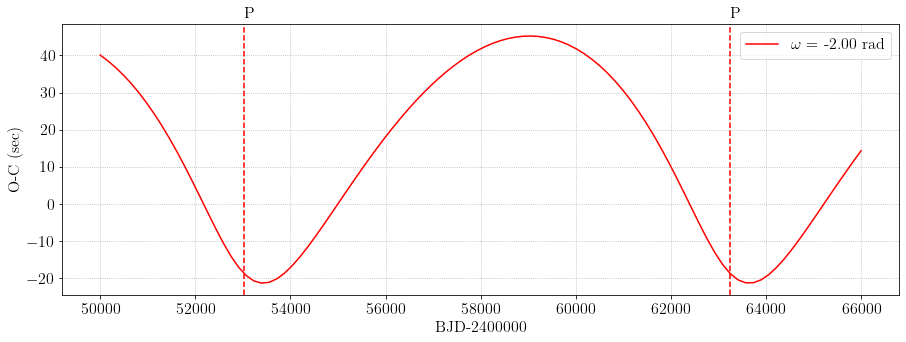

In [16]:
InputFile_out = "w_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')

plt.axvline(x=float(tau), color='r', linestyle='--')
plt.axvline(x=float(tau+P), color='r', linestyle='--')

plt.text(float(tau), 50, 'P')
plt.text(float(tau+P), 50, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [17]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39 
#e = 0
w = -1           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 56155.14249 56141.61722 13.52527
50161.61616 4.52280 4.18566 56314.05510 56303.23338 10.82172
50323.23232 4.62216 4.26974 56472.90543 56464.84954 8.05589
50484.84848 4.72152 4.35602 56631.70592 56626.46570 5.24022
50646.46465 4.82088 4.44476 56790.47139 56788.08187 2.38952
50808.08081 4.92024 4.53627 56949.21959 56949.69803 -0.47844
50969.69697 5.01960 4.63089 57107.97206 57111.31419 -3.34213
51131.31313 5.11896 4.72901 57266.75508 57272.93035 -6.17527
51292.92929 5.21832 4.83106 57425.60089 57434.54651 -8.94562
51454.54545 5.31768 4.93752 57584.54926 57596.16267 -11.61341
51616.16162 5.41704 5.04892 57743.64928 57757.77884 -14.12957
51777.77778 5.51640 5.16581 57902.96136 57919.39500 -16.43364
51939.39394 5.61576 5.28877 58062.55931 58081.01116 -18.45185
52101.01010 5.71512 5.41833 58222.53158 58242.62732 -20.09575
52262.62626 5.81448 5.55490 58382.98073 58404.24348 -21.26275
52424.24242 5.91384 5.69

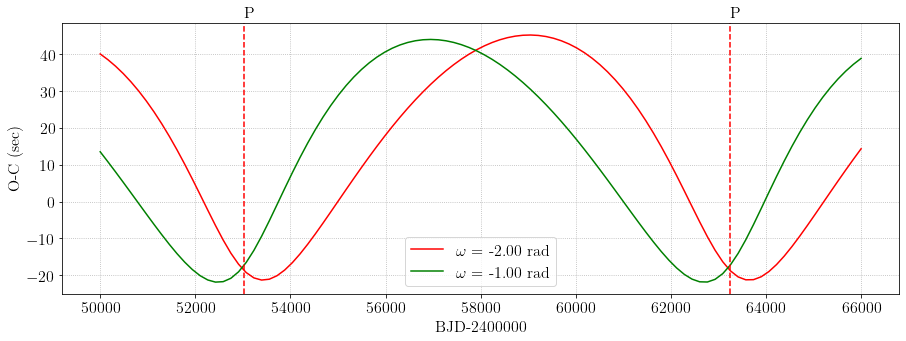

In [18]:
InputFile_out = "w_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')

plt.axvline(x=float(tau), color='r', linestyle='--')
plt.axvline(x=float(tau+P), color='r', linestyle='--')

plt.text(float(tau), 50, 'P')
plt.text(float(tau+P), 50, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [19]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39         
#e = 0
w = 0           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 56116.16263 56141.61722 -25.45459
50161.61616 4.52280 4.18566 56276.40850 56303.23338 -26.82488
50323.23232 4.62216 4.26974 56436.80931 56464.84954 -28.04023
50484.84848 4.72152 4.35602 56597.38448 56626.46570 -29.08122
50646.46465 4.82088 4.44476 56758.15568 56788.08187 -29.92619
50808.08081 4.92024 4.53627 56919.14722 56949.69803 -30.55081
50969.69697 5.01960 4.63089 57080.38641 57111.31419 -30.92778
51131.31313 5.11896 4.72901 57241.90392 57272.93035 -31.02643
51292.92929 5.21832 4.83106 57403.73410 57434.54651 -30.81241
51454.54545 5.31768 4.93752 57565.91515 57596.16267 -30.24752
51616.16162 5.41704 5.04892 57728.48893 57757.77884 -29.28991
51777.77778 5.51640 5.16581 57891.50009 57919.39500 -27.89491
51939.39394 5.61576 5.28877 58054.99413 58081.01116 -26.01703
52101.01010 5.71512 5.41833 58219.01344 58242.62732 -23.61388
52262.62626 5.81448 5.55490 58383.59041 58404.24348 -20.65307
52424.24242 

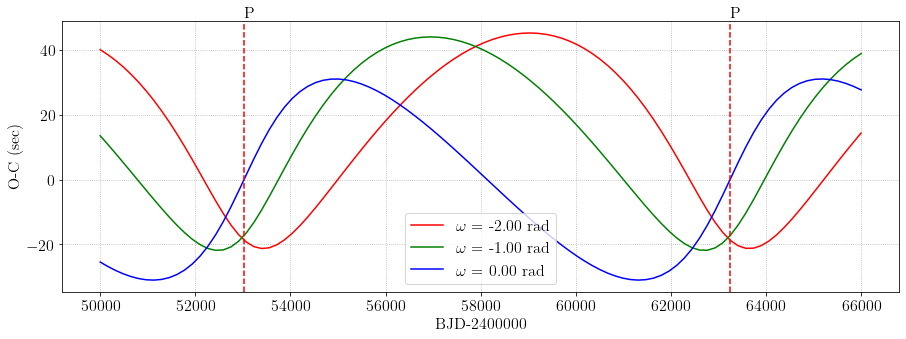

In [20]:
InputFile_out = "w_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\omega$ = 0.00 rad')

plt.axvline(x=float(tau), color='r', linestyle='--')
plt.axvline(x=float(tau+P), color='r', linestyle='--')

plt.text(float(tau), 50, 'P')
plt.text(float(tau+P), 50, 'P')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [21]:
#Parameters
K = 33.7       
P = 10220       
e = 0.39        
#e = 0
w = 1           
tau = 53025   

output = []
print("     BJD      MAno   EAno        O           C         OC")
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    O = Period*Epoch + T0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    C = P0*Epoch + T0
    dP = Period - P0
    dT0 = T0 - T0
    OC = dP*Epoch + dT0 + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    output.append('%0.5f %0.5f %0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i],  O[i], C[i], OC[i]))
    
data_out = output
f = open("w_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

     BJD      MAno   EAno        O           C         OC
50000.00000 4.42344 4.10352 56100.58596 56141.61722 -41.03126
50161.61616 4.52280 4.18566 56263.42497 56303.23338 -39.80841
50323.23232 4.62216 4.26974 56426.49370 56464.84954 -38.35584
50484.84848 4.72152 4.35602 56589.80067 56626.46570 -36.66503
50646.46465 4.82088 4.44476 56753.35452 56788.08187 -34.72736
50808.08081 4.92024 4.53627 56917.16371 56949.69803 -32.53432
50969.69697 5.01960 4.63089 57081.23625 57111.31419 -30.07794
51131.31313 5.11896 4.72901 57245.57900 57272.93035 -27.35135
51292.92929 5.21832 4.83106 57410.19683 57434.54651 -24.34968
51454.54545 5.31768 4.93752 57575.09125 57596.16267 -21.07142
51616.16162 5.41704 5.04892 57740.25842 57757.77884 -17.52042
51777.77778 5.51640 5.16581 57905.68614 57919.39500 -13.70886
51939.39394 5.61576 5.28877 58071.34980 58081.01116 -9.66136
52101.01010 5.71512 5.41833 58237.20676 58242.62732 -5.42056
52262.62626 5.81448 5.55490 58403.18943 58404.24348 -1.05405
52424.24242 5.9

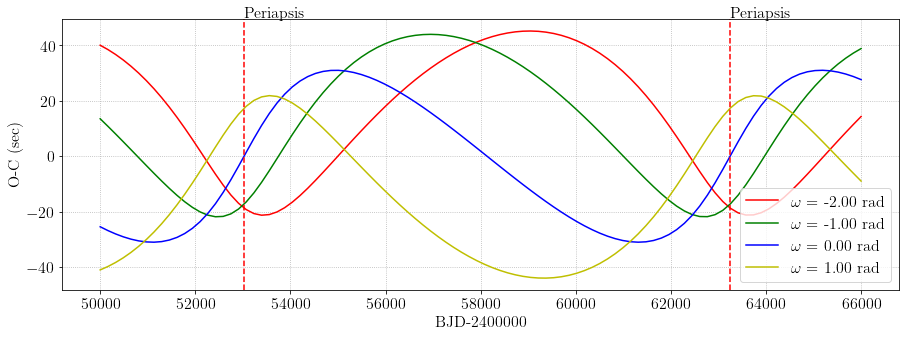

In [23]:
InputFile_out = "w_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,5]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-', color='red',label=r'$\omega$ = -2.00 rad')
plt.plot(x_b, y_b, '-', color='green',label=r'$\omega$ = -1.00 rad')
plt.plot(x_c, y_c, '-', color='blue',label=r'$\omega$ = 0.00 rad')
plt.plot(x_d, y_d, '-', color='y',label=r'$\omega$ = 1.00 rad')

plt.axvline(x=float(tau), color='r', linestyle='--')
plt.axvline(x=float(tau+P), color='r', linestyle='--')

plt.text(float(tau), 50, 'Periapsis')
plt.text(float(tau+P), 50, 'Periapsis')

#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_w2_rev3.pdf", format='pdf', dpi=1200)

plt.show()